In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sbn  
import matplotlib.pyplot as plt 

In [2]:
data = loadarff('..\pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
x, y = df.drop('class', axis=1), np.ravel(df['class'])

In [3]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
knn_predictor = KNeighborsClassifier() #by default it uses uniform weights, k=5 and euclidean distance
gnb_predictor = GaussianNB()

knn_confusion_mtrx = np.zeros((2,2))  
knn_accs = [] #accuracies of each fold for the knn_predictor
gnb_confusion_mtrx = np.zeros((2,2)) 
gnb_accs = [] #accuracies of each fold for the gnb_predictor

for train_index, test_index in folds.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler().fit(x_train)
    x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
    
    #kNN
    knn_predictor.fit(x_train, y_train)
    knn_y_pred = knn_predictor.predict(x_test)
    knn_confusion_mtrx = knn_confusion_mtrx + confusion_matrix(y_test, knn_y_pred)
    knn_accs.append(accuracy_score(y_test, knn_y_pred)) 

    #Naive Bayes
    gnb_predictor.fit(x_train, y_train)
    gnb_y_pred = gnb_predictor.predict(x_test)
    gnb_confusion_mtrx = gnb_confusion_mtrx + confusion_matrix(y_test, gnb_y_pred)
    gnb_accs.append(accuracy_score(y_test, gnb_y_pred))  



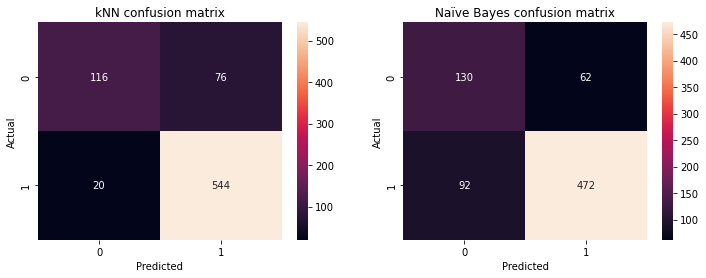

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sbn.heatmap(knn_confusion_mtrx, annot=True, fmt='g', ax=ax1).set(xlabel='Predicted', ylabel='Actual')
ax1.set_title("kNN confusion matrix")
sbn.heatmap(gnb_confusion_mtrx, annot=True, fmt='g', ax=ax2).set(xlabel='Predicted', ylabel='Actual')
ax2.set_title("Naïve Bayes confusion matrix")
plt.show()

In [5]:
print(knn_accs) 
print(gnb_accs)   
print(stats.ttest_rel(knn_accs, gnb_accs, alternative='greater'))

[0.8947368421052632, 0.868421052631579, 0.9078947368421053, 0.8157894736842105, 0.8947368421052632, 0.8157894736842105, 0.9066666666666666, 0.8666666666666667, 0.8666666666666667, 0.8933333333333333]
[0.8026315789473685, 0.7368421052631579, 0.75, 0.8289473684210527, 0.8289473684210527, 0.8026315789473685, 0.8933333333333333, 0.7733333333333333, 0.72, 0.8266666666666667]
Ttest_relResult(statistic=4.110857874643797, pvalue=0.001316817828490826)
